In [2]:
from astropy.io import fits

tempimagename = fits.open(f"/users/kushpatel/downloads/final_g_image.fits")
temp_data = tempimagename[0].data
tempimagename1 = fits.open(f"/users/kushpatel/downloads/final_Ha_image.fits")
temp_data1 = tempimagename1[0].data

In [3]:
from astropy.stats import sigma_clipped_stats
import numpy as np
import matplotlib.pyplot as plt

def manual_ellipse_picker(image, col0, row0, rad1_0, rad2_0,
                          vmin=None, vmax=None):

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap='plasma')
    plt.colorbar(im, fraction=0.046, pad=0.04)

    ax.set_title("Adjust Ellipse for Initial Guess")

    p = np.linspace(0, 2*np.pi, 400)

    # Initial ellipse
    xc = col0 + rad1_0*np.cos(p)
    yc = row0 + rad2_0*np.sin(p)
    ellipse_line, = ax.plot(xc, yc, 'w', lw=2)

    def update(val):
        rad1 = s_a.val
        rad2 = s_b.val
        xc = col0 + rad1*np.cos(p)
        yc = row0 + rad2*np.sin(p)
        ellipse_line.set_data(xc, yc)
        fig.canvas.draw_idle()

    plt.show()

    print("After closing the window, use these initial values:")
    print(f"col = {col0}")
    print(f"row = {row0}")
    print(f"rad1 = {rad1_0:.1f}")
    print(f"rad2 = {rad2_0:.1f}")


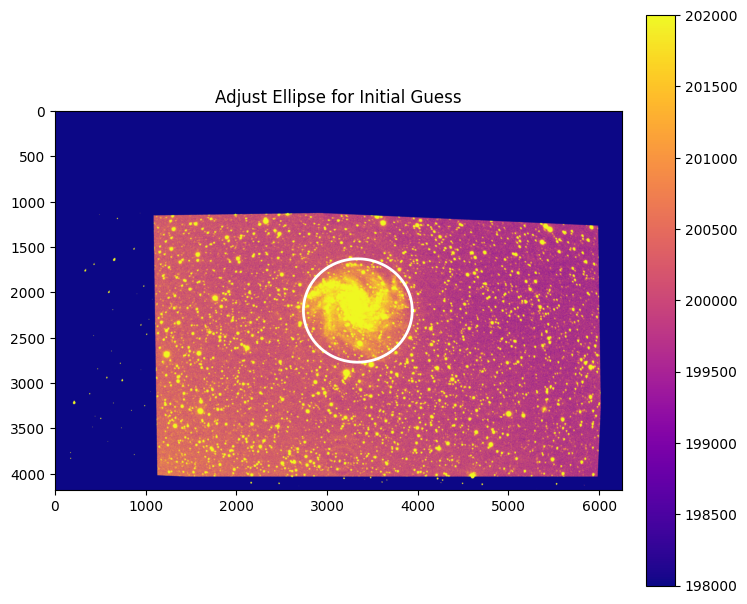

After closing the window, use these initial values:
col = 3340
row = 2200
rad1 = 600.0
rad2 = 570.0


In [4]:
manual_ellipse_picker(
    temp_data,
    col0=3340,      # your estimated source X
    row0=2200,      # your estimated source Y
    rad1_0=600,
    rad2_0=570,
    vmin=198000,
    vmax=202000
)

# Appears tight enough to the galaxy edges to use as initial guess for removal of background

In [5]:
true_data = temp_data.copy()

# box boundaries
x_min, x_max = 1500,5500
y_min, y_max = 1300, 3800

# create coordinate grid
ny, nx = true_data.shape
Y, X = np.indices((ny, nx))

# boolean mask: True = inside box
inside_box = (X >= x_min) & (X <= x_max) & (Y >= y_min) & (Y <= y_max)

# replace outside box with NaN
true_data[~inside_box] = np.nan

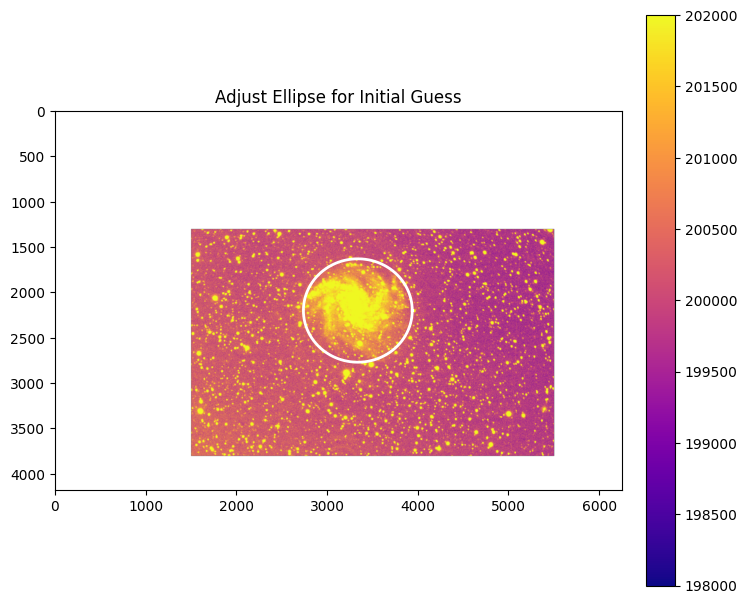

After closing the window, use these initial values:
col = 3340
row = 2200
rad1 = 600.0
rad2 = 570.0


In [6]:
# cutout region of interest successfully created

manual_ellipse_picker(
    true_data,
    col0=3340,      # your estimated source X
    row0=2200,      # your estimated source Y
    rad1_0=600,
    rad2_0=570,
    vmin=198000,
    vmax=202000
)

In [9]:
# Assume `image` is your 2D galaxy array

image = true_data.copy()  # Example: using g-band image


# Get background statistics
mean, median, sigma = sigma_clipped_stats(image)

# Define threshold as 0.01-sigma above background
threshold = median + 1*sigma

# Boolean mask: True where galaxy pixels are
galaxy_mask = image > threshold

# Optional: compute area (number of pixels)
area_pixels = galaxy_mask.sum()


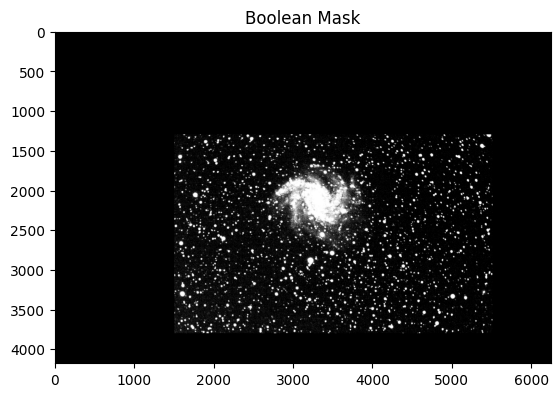

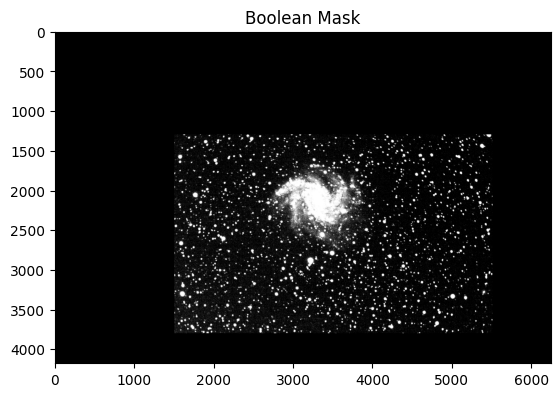

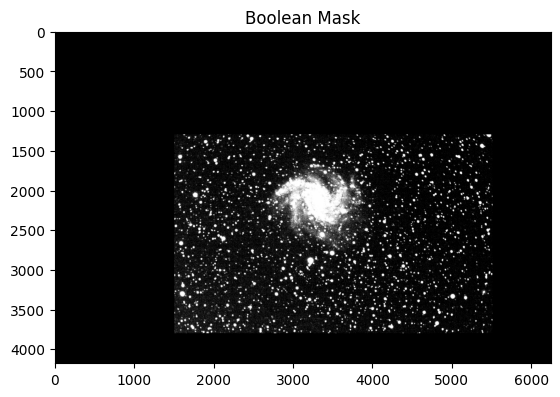

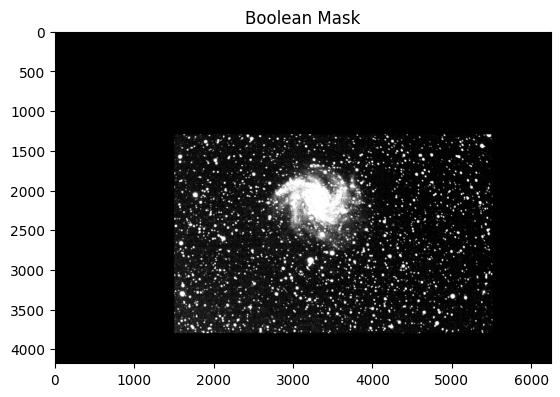

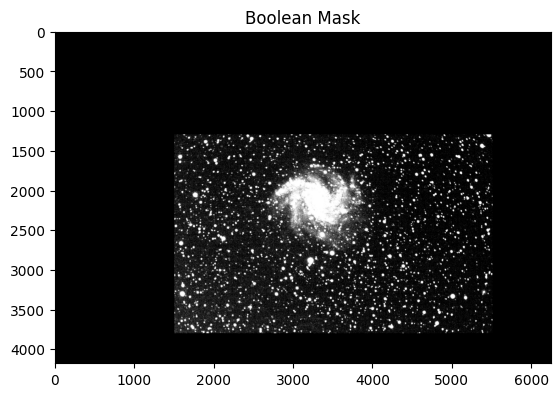

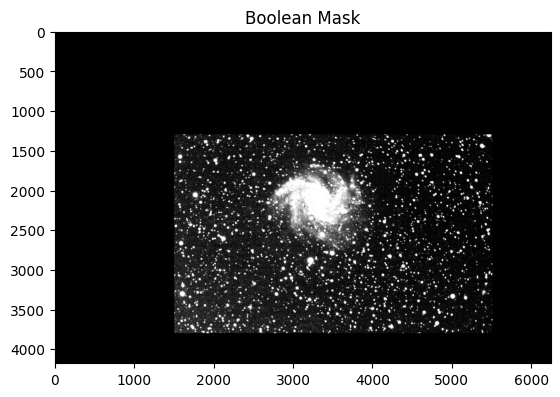

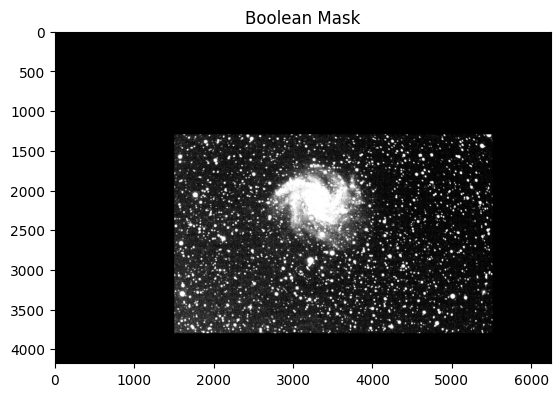

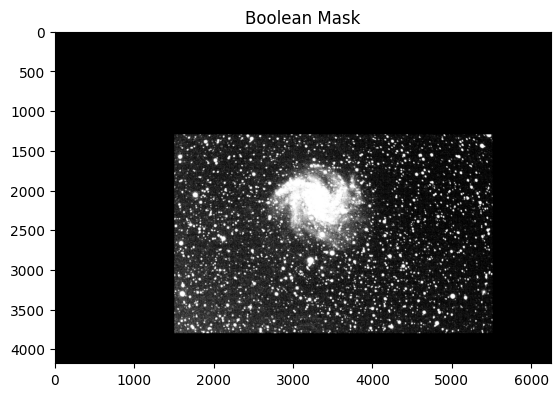

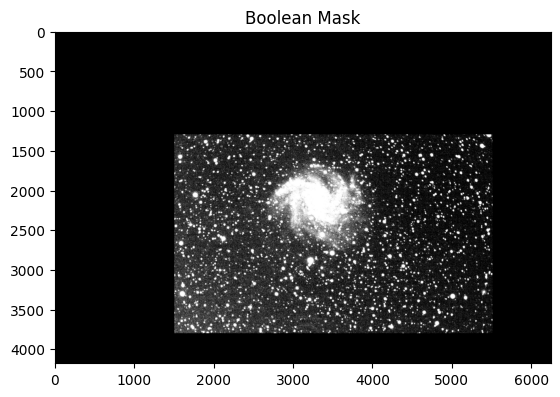

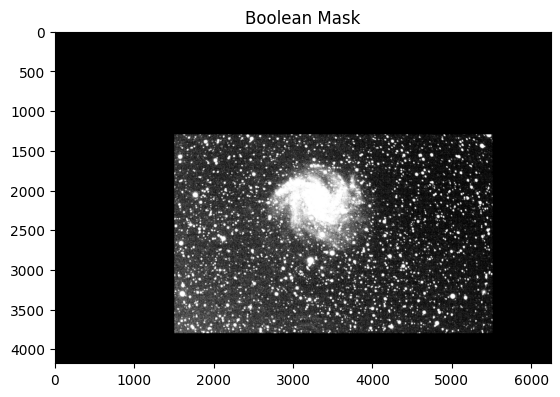

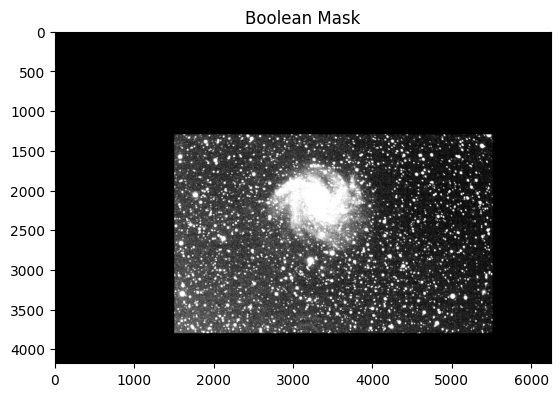

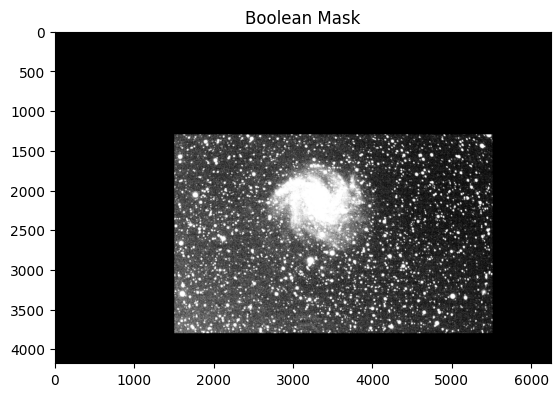

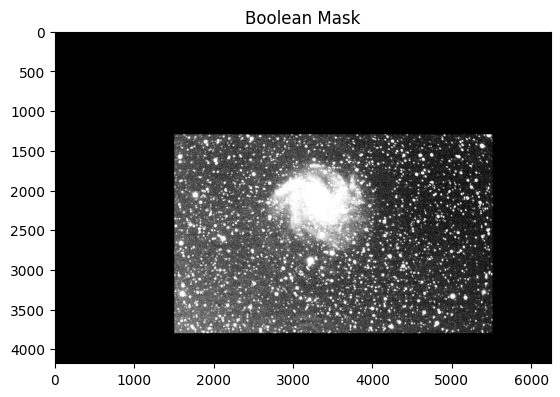

In [8]:
# 1 is where it appears to begin shrinking and background is darkened, so most noise based pixels appears to be gone at this point

for i in reversed([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6]):
    threshold2 = median + i*sigma

    # Boolean mask: True where galaxy pixels are
    galaxy_mask2 = image > threshold2

    # Optional: compute area (number of pixels)
    area_pixels2 = galaxy_mask2.sum()

    plt.imshow(galaxy_mask2, cmap='gray')
    plt.title("Boolean Mask")
    plt.show()

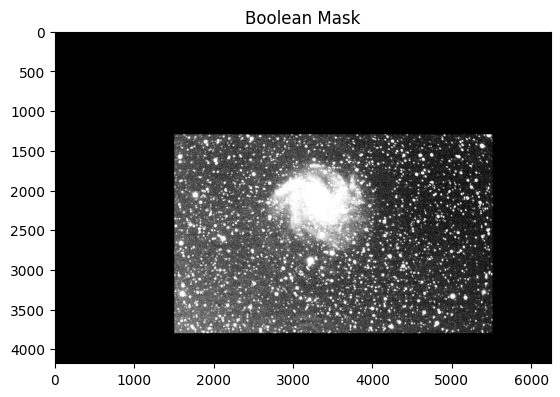

In [102]:
plt.imshow(galaxy_mask2, cmap='gray')
plt.title("Boolean Mask")
plt.show()

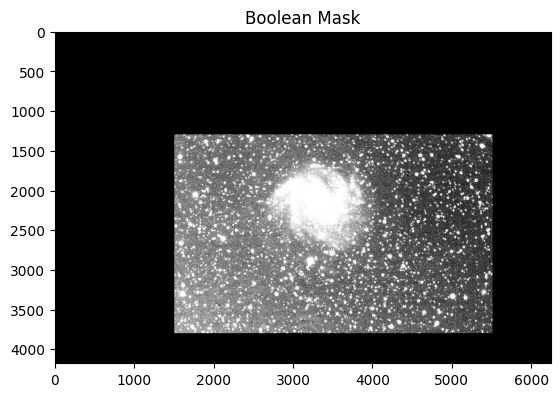

In [103]:
plt.imshow(galaxy_mask, cmap='gray')
plt.title("Boolean Mask")
plt.show()

In [12]:
import numpy as np

# image is your 2D numpy array
h, w = image.shape

# ellipse parameters
xc, yc = 3340, 2200     # example center
a, b = 600, 570       # semi-major and semi-minor axes

# coordinate grid
y, x = np.indices((h, w))

# shift coords
x_shift = x - xc
y_shift = y - yc

# ellipse equation
ellipse_mask = (x_shift**2 / a**2 + y_shift**2 / b**2) <= 1


In [13]:
galaxy_only = galaxy_mask.copy()
galaxy_only[~ellipse_mask] = 0

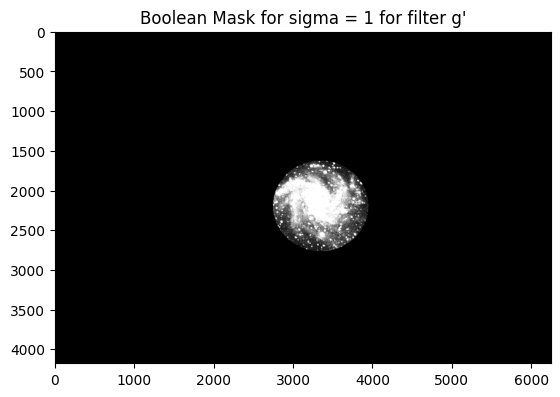

In [16]:
# Almost all pixels are primarily saturated with galaxy light (good!)

plt.imshow(galaxy_only, cmap='gray')
plt.title("Boolean Mask for sigma = 1 for filter g'")
plt.show()

In [107]:
# Now perform Monte Carlo simulation to estimate uncertainty centered around 1 sigma

count = np.zeros(10000)

random_coefficients = np.random.normal(1,0.5,10000)

for k in range(10000):
    noisy = image + random_coefficients[k]*sigma
    mask_k = noisy > threshold
    mask_k[~ellipse_mask] = 0
    count[k] = mask_k.sum()

uncertainty = np.std(count)
mean_count = np.mean(count)

In [108]:
# Final result of area for g'
print(f"Estimated area: {mean_count} +/- {uncertainty} pixels")

Estimated area: 1035261.9937 +/- 42526.9955792325 pixels


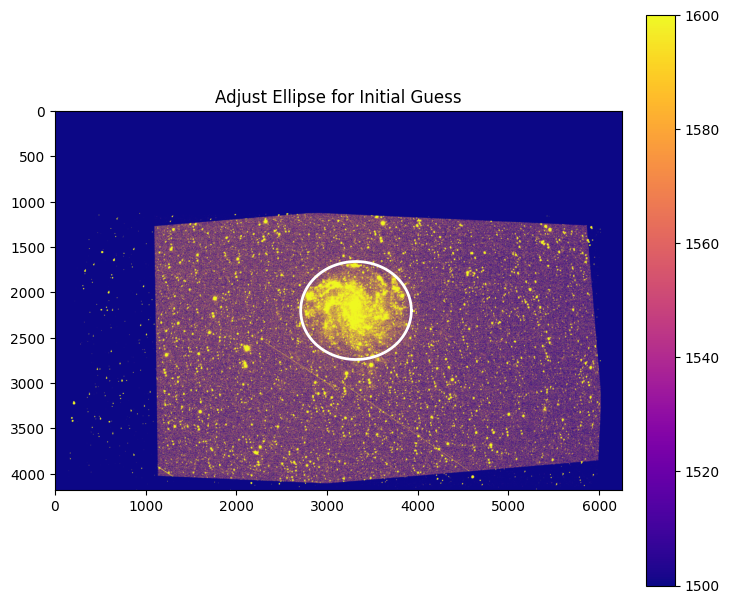

After closing the window, use these initial values:
col = 3320
row = 2200
rad1 = 610.0
rad2 = 540.0


In [109]:
manual_ellipse_picker(
    temp_data1,
    col0=3320,      # your estimated source X
    row0=2200,      # your estimated source Y
    rad1_0=610,
    rad2_0=540,
    vmin=1500,
    vmax=1600
)

In [18]:
true_data = temp_data1.copy()

# box boundaries
x_min, x_max = 1500,5500
y_min, y_max = 1300, 3800

# create coordinate grid
ny, nx = true_data.shape
Y, X = np.indices((ny, nx))

# boolean mask: True = inside box
inside_box = (X >= x_min) & (X <= x_max) & (Y >= y_min) & (Y <= y_max)

# replace outside box with NaN
true_data[~inside_box] = np.nan

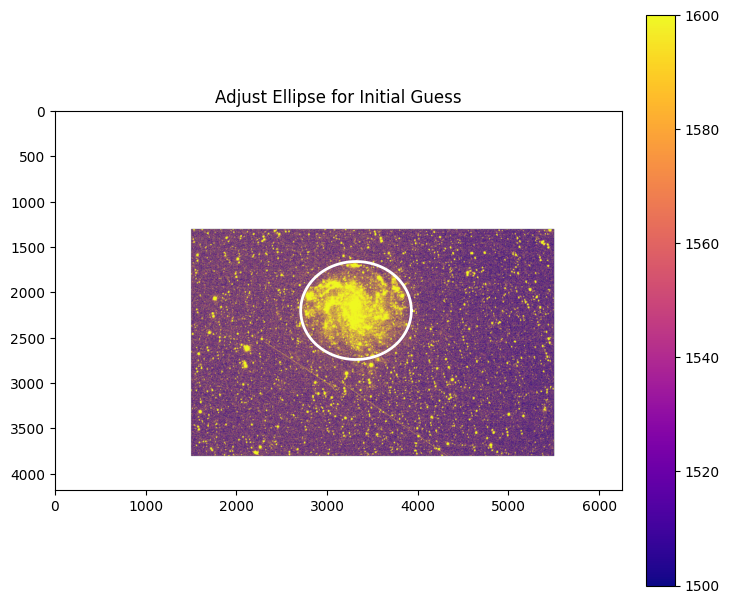

After closing the window, use these initial values:
col = 3320
row = 2200
rad1 = 610.0
rad2 = 540.0


In [111]:
manual_ellipse_picker(
    true_data,
    col0=3320,      # your estimated source X
    row0=2200,      # your estimated source Y
    rad1_0=610,
    rad2_0=540,
    vmin=1500,
    vmax=1600
)

In [19]:
image = true_data.copy()  # Example: using Ha image

from astropy.stats import sigma_clipped_stats
import numpy as np

# Assume `image` is your 2D galaxy array

# Get background statistics
mean, median, sigma = sigma_clipped_stats(image)

# Define threshold as 0.01-sigma above background
threshold = median + 1.2*sigma

# Boolean mask: True where galaxy pixels are
galaxy_mask = image > threshold

# Optional: compute area (number of pixels)
area_pixels = galaxy_mask.sum()

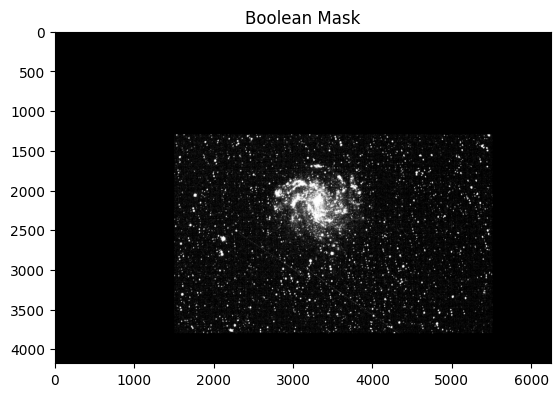

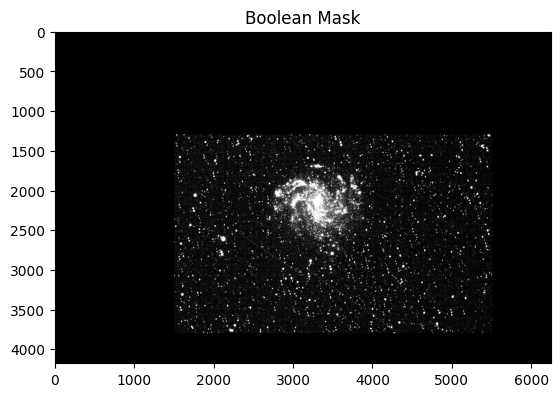

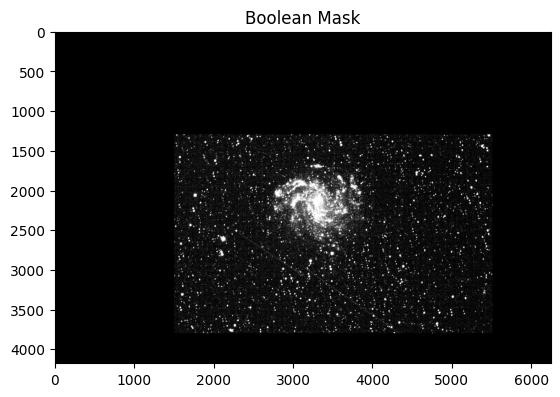

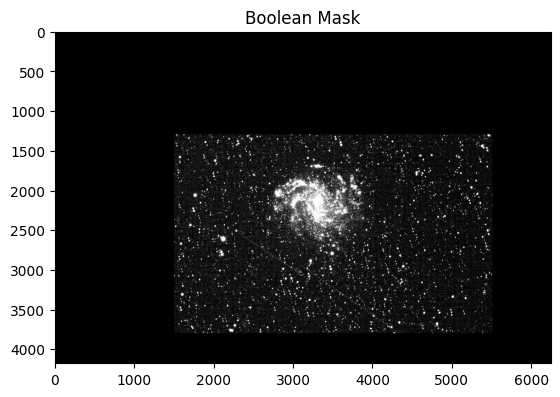

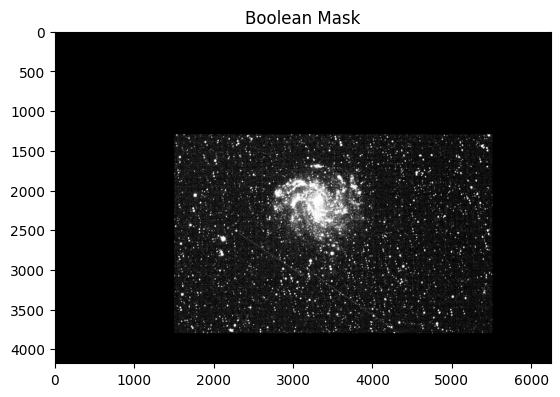

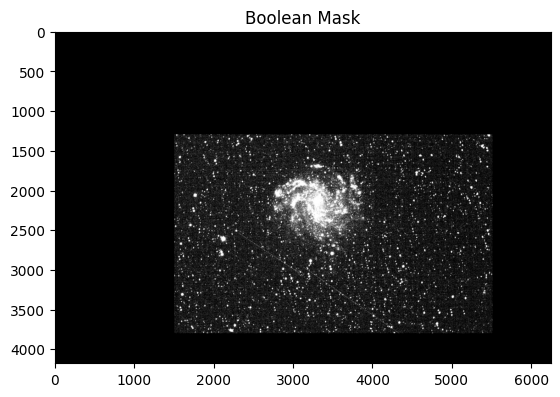

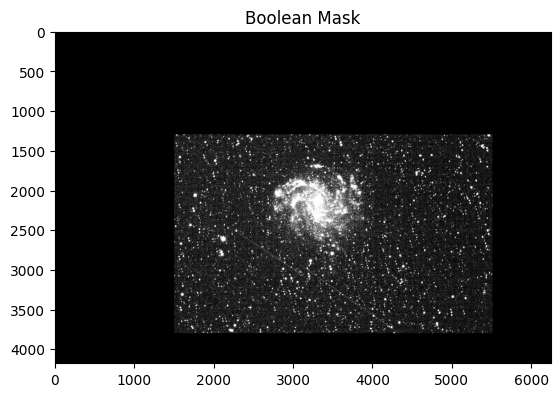

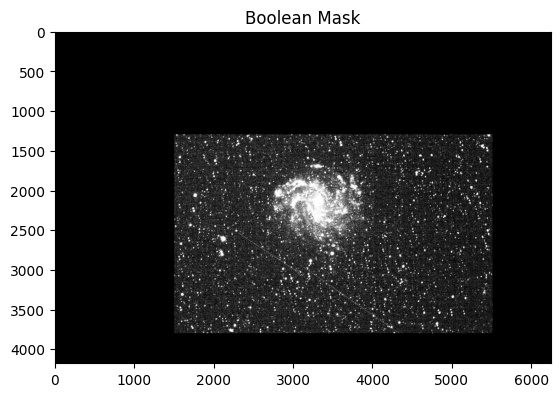

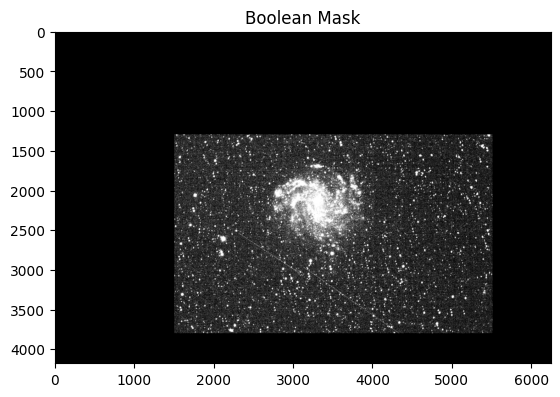

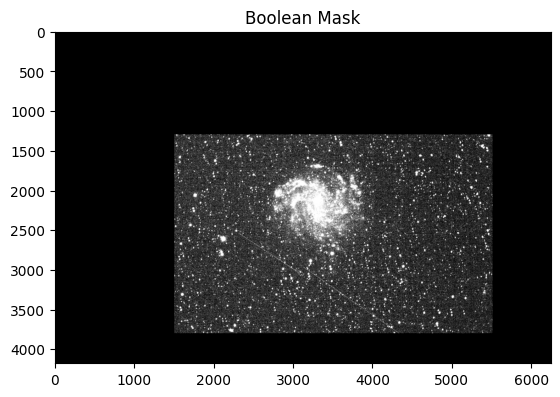

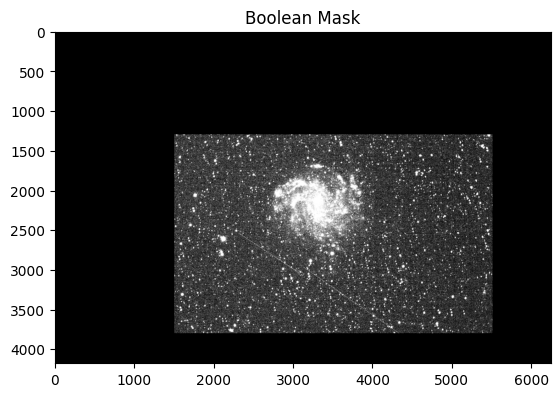

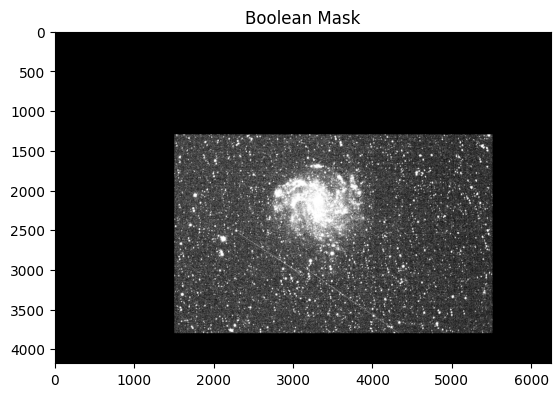

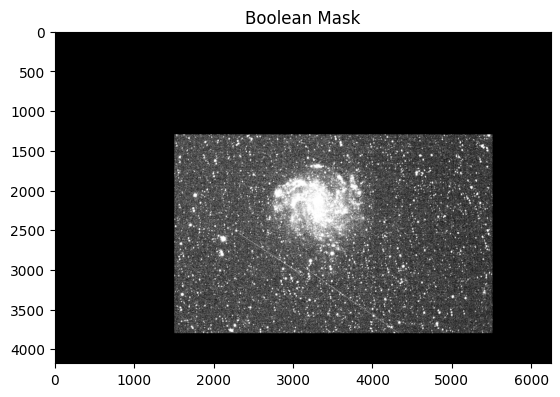

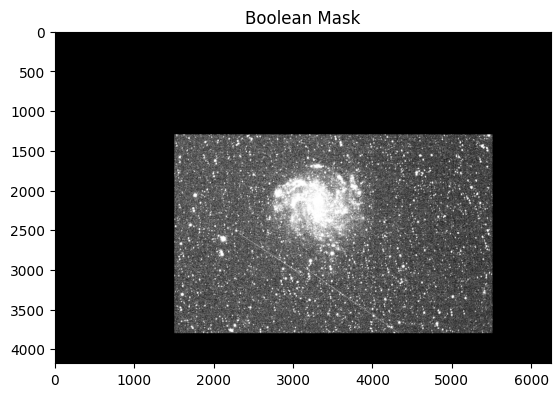

In [113]:
# Seems to be apparent shrinking after 1.2 sigma, so that will be the center.

for i in reversed([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6]):
    threshold2 = median + i*sigma

    # Boolean mask: True where galaxy pixels are
    galaxy_mask2 = image > threshold2

    # Optional: compute area (number of pixels)
    area_pixels2 = galaxy_mask2.sum()

    plt.imshow(galaxy_mask2, cmap='gray')
    plt.title("Boolean Mask")
    plt.show()

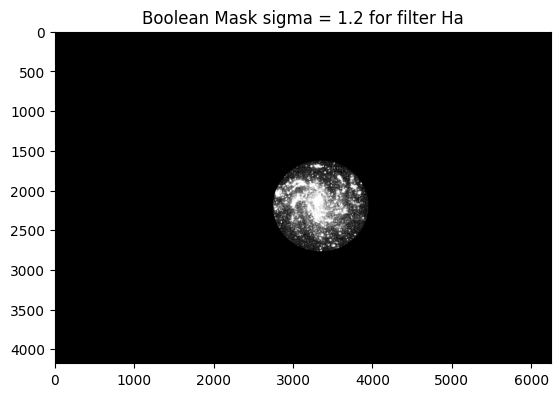

In [21]:
threshold2 = median + 1.2*sigma

# Boolean mask: True where galaxy pixels are
galaxy_mask2 = image > threshold2

galaxy_mask2[~ellipse_mask] = 0

# Optional: compute area (number of pixels)
area_pixels2 = galaxy_mask2.sum()

plt.imshow(galaxy_mask2, cmap='gray')
plt.title("Boolean Mask sigma = 1.2 for filter Ha")
plt.show()

In [115]:
import numpy as np

# image is your 2D numpy array
h, w = image.shape

# ellipse parameters
xc, yc = 3320, 2200     # example center
a, b = 610, 540       # semi-major and semi-minor axes

# coordinate grid
y, x = np.indices((h, w))

# shift coords
x_shift = x - xc
y_shift = y - yc

# ellipse equation
ellipse_mask = (x_shift**2 / a**2 + y_shift**2 / b**2) <= 1

In [116]:
# Now perform Monte Carlo simulation to estimate uncertainty from 1.2 sigmas

count = np.zeros(10000)

random_coefficients = np.random.normal(1.2,0.5,10000)

for k in range(10000):
    noisy = image + random_coefficients[k]*sigma
    mask_k = noisy > threshold
    mask_k[~ellipse_mask] = 0
    count[k] = mask_k.sum()

uncertainty = np.std(count)
mean_count = np.mean(count)

In [117]:
# Final result of area for Ha
print(f"Estimated area: {mean_count} +/- {uncertainty} pixels")

Estimated area: 952657.256 +/- 68451.31102034105 pixels
